In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_csv('merc.csv')
df.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


| Code   | Description   |
|:---|:---|
|**Model** | Car Model |
|**Year**  |  registraion year | 
|**Price**  | price in Euros | 
|**Transmission**  | type of gear box | 
|**Mileage**  | mileage distance used | 
|**FuelType**  | Type engine fuel | 
|**tax**  | road tax | 
|**mpg**  | miles per galoon | 
|**engineSize**  | size engine in litres | 


In [3]:
df.shape

(13119, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [6]:
print (f'Data kosong:' ,df.isnull().sum().sum())
print (f'Data Na:', df.isna().sum().sum())
print (f'Data Duplicated', df.duplicated().sum())

Data kosong: 0
Data Na: 0
Data Duplicated 259


In [7]:
df.loc[df.duplicated(keep=False)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
468,V Class,2018,19998,Manual,27222,Diesel,145,46.3,2.1
469,V Class,2016,17998,Manual,21981,Diesel,200,46.3,2.1
493,V Class,2018,19998,Manual,27222,Diesel,145,46.3,2.1
494,V Class,2016,17998,Manual,21981,Diesel,200,46.3,2.1
1327,GLB Class,2020,35400,Semi-Auto,2000,Diesel,145,46.3,2.0
...,...,...,...,...,...,...,...,...,...
11742,E Class,2016,17990,Automatic,39000,Diesel,30,65.7,2.0
12798,A Class,2020,26590,Automatic,2563,Petrol,145,53.3,1.3
12799,B Class,2020,27490,Automatic,2563,Diesel,145,55.4,2.0
12800,B Class,2020,27490,Automatic,2563,Diesel,145,55.4,2.0


In [8]:
categoric = df.select_dtypes(include='O')
for i in categoric.columns:
  print(categoric[i].value_counts())
  print()

 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
 GLE Class     461
 SL CLASS      260
 CLS Class     237
 V Class       207
 S Class       197
 GL Class      121
 SLK            95
 CLA Class      86
 X-CLASS        82
 M Class        79
 GLS Class      74
 GLB Class      19
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
180              1
230              1
220              1
200              1
Name: model, dtype: int64

Semi-Auto    6848
Automatic    4825
Manual       1444
Other           2
Name: transmission, dtype: int64

Diesel    9187
Petrol    3752
Hybrid     173
Other        7
Name: fuelType, dtype: int64



In [9]:
for col in df.columns:
    print(col,':',df[col].nunique())
    print(df[col].value_counts().nlargest(7))
    print('\n'+'*'*20+'\n')

model : 27
 C Class      3747
 A Class      2561
 E Class      1953
 GLC Class     960
 GLA Class     847
 B Class       591
 CL Class      511
Name: model, dtype: int64

********************

year : 25
2019    4553
2017    2381
2016    1971
2018    1467
2015     991
2020     719
2014     491
Name: year, dtype: int64

********************

price : 4424
24999    48
19999    46
17999    44
14999    42
19000    40
25980    39
15999    39
Name: price, dtype: int64

********************

transmission : 4
Semi-Auto    6848
Automatic    4825
Manual       1444
Other           2
Name: transmission, dtype: int64

********************

mileage : 9716
1000    324
16       62
3999     61
2000     59
9        45
5000     40
6000     38
Name: mileage, dtype: int64

********************

fuelType : 4
Diesel    9187
Petrol    3752
Hybrid     173
Other        7
Name: fuelType, dtype: int64

********************

tax : 40
145    7645
20     1251
125    1013
30      989
150     855
200     276
160     188

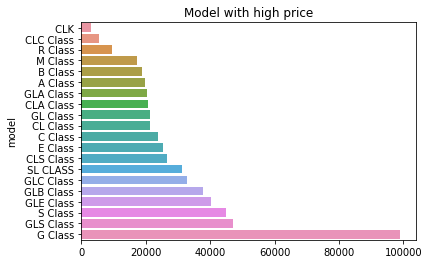

In [11]:
lpm = df.groupby('model')['price'].mean()[0:20].sort_values()
sns.barplot(y=lpm.index,x=lpm.values);
plt.title('Model with high price');

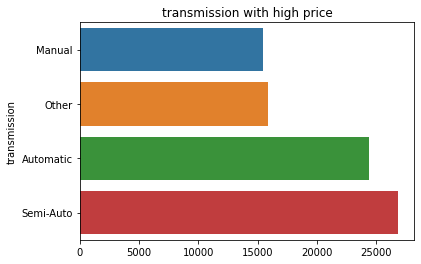

In [13]:
lpm = df.groupby('transmission')['price'].mean()[0:20].sort_values()
sns.barplot(y=lpm.index,x=lpm.values);
plt.title('transmission with high price');

In [14]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [25]:
# One hot encode
df = pd.get_dummies(df, columns = ['model', 'transmission','fuelType'])

In [26]:
x = df.drop(columns = ['price', 'mileage', 'mpg'])
y = df.price

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size = 0.25,shuffle = True ,random_state = 404)

In [28]:
def performance(model,X_train,y_train,y_pred,y_test):
    '''
    This function for calculating the performance of the model.
    INPUT:
    model: Regression Model. The regression model.
    x_train: numpy.ndarray. The training data in the x.
    y_train: pandas.core.series.Series. The training data in the y.
    y_pred: numpy.ndarray. The predicted data.
    y_test: pandas.core.series.Series. The actual data.
    OUTPUT:
    The model performance by different metrics.
    '''
    print('Training Score:',model.score(X_train,y_train))
    print('Testing Score:',r2_score(y_test,y_pred))
    print('Other Metrics In Testing Data: ')
    print('MSE:',mean_squared_error(y_test,y_pred))
    print('MAE:',mean_absolute_error(y_test,y_pred))

In [29]:
#Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [30]:
#Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

#The predicted data
lr_pred = lr.predict(X_test)

In [31]:
performance(lr,X_train,y_train,lr_pred,y_test)

Training Score: 0.7192662202503451
Testing Score: 0.765539705423305
Other Metrics In Testing Data: 
MSE: 31523446.722185284
MAE: 3738.4076778412386


In [32]:
#Fitting the model
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)

#The predicted data
ridge_pred = ridge.predict(X_test)

#The performance
performance(ridge,X_train,y_train,ridge_pred,y_test)

Training Score: 0.7191039558379162
Testing Score: 0.7646506508538682
Other Metrics In Testing Data: 
MSE: 31642981.095386323
MAE: 3738.212692040656


In [33]:


#Fitting the model
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

#The predicted data
dt_pred = dt.predict(X_test)

#The performance
performance(dt,X_train,y_train,dt_pred,y_test)



Training Score: 0.9473698916689107
Testing Score: 0.9161564600239258
Other Metrics In Testing Data: 
MSE: 11272856.96798702
MAE: 2231.6500616316134


In [34]:
#Fitting the model
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

#The predicted data
xgb_pred = xgb.predict(X_test)

#The performance
performance(xgb,X_train,y_train,xgb_pred,y_test)

[07:34:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score: 0.9012163591327652
Testing Score: 0.8896275870238117
Other Metrics In Testing Data: 
MSE: 14839693.374674028
MAE: 2612.2083860071693


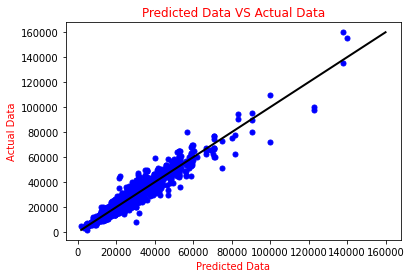

In [35]:
plt.scatter(dt_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted Data',c='red')
plt.ylabel('Actual Data',c='red')
plt.title('Predicted Data VS Actual Data',c='red')
plt.show()

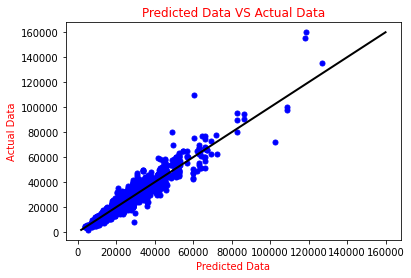

In [36]:
plt.scatter(xgb_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted Data',c='red')
plt.ylabel('Actual Data',c='red')
plt.title('Predicted Data VS Actual Data',c='red')
plt.show()

Best Estimator: DecisionTreeRegressor(max_depth=19, min_samples_leaf=2, min_samples_split=6)
Best Params: {'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 6}
Training Score: 0.9347203069496005
Testing Score: 0.9148437155738891
Other Metrics In Testing Data: 
MSE: 11449356.915687287
MAE: 2249.665560228193


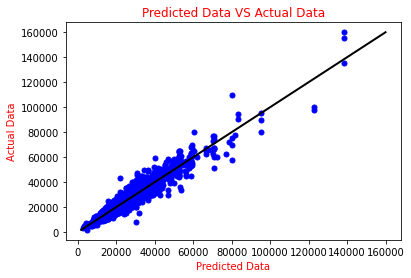

In [37]:
#Grid Search
params = [
    {'max_depth':list(range(5,20)),'min_samples_split':list(range(2,15)),"min_samples_leaf":[2,3,4]}
         ]
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params,cv=10,n_jobs=-1)

#Fitting the model
grid_search.fit(X_train,y_train)

#The best estimator
print('Best Estimator:',grid_search.best_estimator_)

#The best parameters
print('Best Params:',grid_search.best_params_)

#The predicted data
grid_pred = grid_search.predict(X_test)

#Decision tree performance after tuning
performance(grid_search,X_train,y_train,grid_pred,y_test)

#Plotting the results
plt.scatter(grid_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted Data',c='red')
plt.ylabel('Actual Data',c='red')
plt.title('Predicted Data VS Actual Data',c='red')
plt.show()

Best Estimator: RandomForestRegressor(max_depth=18, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=500)
Best Params: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 18}
Training Score: 0.9198602164876276
Testing Score: 0.8917232811840858
Other Metrics In Testing Data: 
MSE: 14557924.96980757
MAE: 2278.511794537011


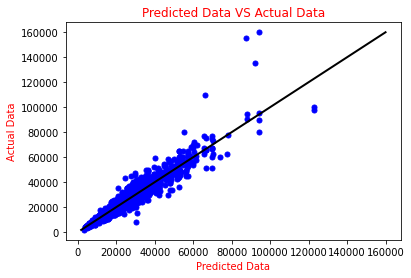

In [38]:
#Randomized search
params = [
    {'n_estimators':[100,200,3000,400,500,600],
     'max_depth':list(range(5,20)),'min_samples_split':list(range(2,15)),"min_samples_leaf":[2,3,4,5]
     }
         ]
rand_search = RandomizedSearchCV(RandomForestRegressor(),params,cv=10,n_jobs=-1)

#Fitting the model
rand_search.fit(X_train,y_train.values.ravel())

#The best estimator
print('Best Estimator:',rand_search.best_estimator_)

#The best parameters
print('Best Params:',rand_search.best_params_)

#The predicted data
rand_pred = rand_search.predict(X_test)

#Decision tree performance after tuning
performance(rand_search,X_train,y_train,rand_pred,y_test)

#Plotting the results
plt.scatter(rand_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted Data',c='red')
plt.ylabel('Actual Data',c='red')
plt.title('Predicted Data VS Actual Data',c='red')
plt.show()